In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f  }" % (n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

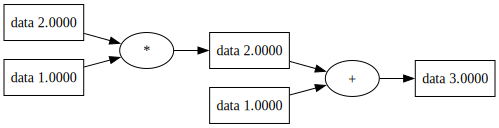

In [43]:
# a very simple example
x = Value(1.0)
y = x * 2 + 1

draw_dot(y)

In [37]:
class Value:
    def __init__(self,data,_children=(),_op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        return Value(self.data + other.data,(self,other),"+")
        
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        return Value(self.data * other.data,(self,other),"*")
        

    def __radd__(self,other):
        return self + other
    
    def __rmul__(self, other):
        return self * other
    
    def __repr__(self) -> str:
        return f"Value(data={self.data})"

In [29]:
a = Value(5)
b = Value(-3)
c = Value(8)
d = a*b + c

In [31]:
d._prev

{Value(data=-15), Value(data=8)}

In [32]:
d._op

'+'

In [30]:
5+a

Value(data=10)